# Exploratory Data Analysis on the Car Price Prediction in the German Used Market

## 1. 📌 Introduction
- Objective: To analyze patterns in the German used car market 
- Dataset Source: Autoscout24.de or Kaggle  
- Features:
  - Brand: The brand or manufacturer of the car.
  - Model: The specific model of the car.
  - Color: The color of the car's exterior.
  - Registration Date: The date when the car was registered (Month/Year).
  - Year of Production: The year in which the car was manufactured.
  - Price in Euro: The price of the car in Euros.
  - Power: The power of the car in kilowatts (kW) and horsepower (ps).
  - Transmission Type: The type of transmission (e.g., automatic, manual).
  - Fuel Type: The type of fuel the car requires.
  - Fuel Consumption: Information about the car's fuel consumption in L/100km ang g/km.
  - Mileage: The total distance traveled by the car in km.
  - Offer Description: Additional description provided in the car offer.   
- Tools & Libraries Used
  - Python, Jupyter Notebbok
  - Libraries: Python Pandas, Numpy, SciPy, Scikit, Seaborn, Matplotlib

In [658]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [659]:
df_main=pd.read_csv("cars_dataset_cleaned.csv")
df_main.head(4)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,01.10.1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.0,260.00,1605000.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,01.07.1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.0,225.00,1895000.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,01.11.1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.0,52.15,961270.0,"3.0i Super V6, absoluter Topzustand !"
3,alfa-romeo,Alfa Romeo Spider,red,01.04.1996,1996.0,7900.0,110.0,150.0,Manual,Petrol,9.0,225.00,473070.0,2.0 16V Twin Spark


In [660]:
df_main["brand"].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [661]:
(df_main["mileage_in_km"] == 0).any()

False

## Exploratory Data Analysis

### Price Trends by Brand and Model

#### Which brands have the highest average resale value? Are there outliers skewing the distribution?

In [665]:
df_main["price_in_euro"] = pd.to_numeric(df_main["price_in_euro"], errors='coerce')
brand_avg_price=df_main.groupby("brand")["price_in_euro"].mean().sort_values(ascending=False)
brand_avg_price.head(10)

brand
lamborghini     387289.189964
ferrari         287838.530303
bentley         202170.272500
aston-martin    167550.737557
porsche          91750.222412
maserati         77234.399312
chrysler         71430.500000
dodge            65533.010490
land-rover       58360.852186
jaguar           45001.576636
Name: price_in_euro, dtype: float64

The following above are the top 10 brands with the highest resale value. We can also visualize a box plot by filtering the top 10 brands to see the presence of any outliers.

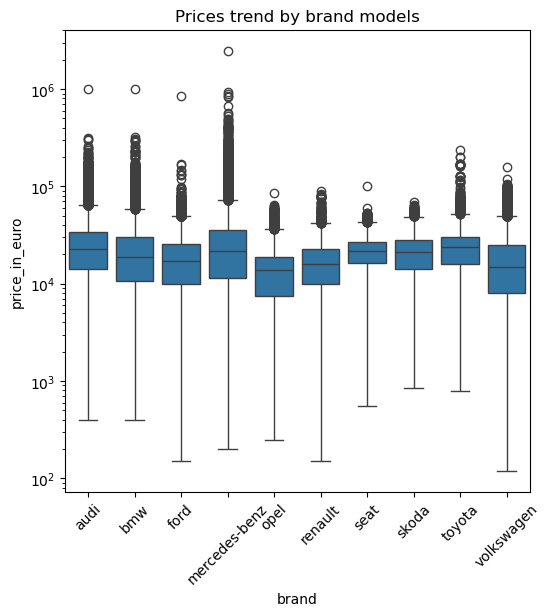

In [667]:
top_brands=df_main["brand"].value_counts().nlargest(10).index
filtered_df=df_main[df_main["brand"].isin(top_brands)]
plt.figure(figsize=(6,6))
sns.boxplot(data=filtered_df, x="brand", y="price_in_euro")
plt.xticks(rotation=45)
plt.title("Prices trend by brand models")
plt.yscale('log') 
plt.savefig("Brands according to prices.pdf")
plt.show()

- Mercedes Benz and Audi shows the highest median prices, indication a strong resale values.
- Ford, Opel and Renault shows a considerable lower median resale values. More budget-friendly, possibly with higher depriciation
- Mercedes benz have outlier reaching price to about 100,000 euros which can be sport cars, luxury or mispriced car values. 

#### Are there price differences between different models in the same brands?

##### Brand 1: BMW

In [671]:
brand_df=df_main[df_main["brand"]=="bmw"]
top_bmw_models=brand_df["brand"].value_counts().nlargest(20).index
filtered_bmw=brand_df[brand_df["brand"].isin(top_bmw_models)]
filtered_bmw

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
21446,bmw,BMW 320,grey,01.07.1995,1995.0,7950.0,110.0,150.0,Manual,Petrol,9.0,213.00,2290000.0,320i E36 Limosine Classic Car TÜV NEU
21447,bmw,BMW 520,grey,01.12.1995,1995.0,16950.0,110.0,150.0,Manual,Petrol,8.0,300.00,695090.0,5er 24V *** NEUWERTIG ***
21448,bmw,BMW 318,black,01.08.1996,1996.0,10500.0,85.0,116.0,Manual,Petrol,8.0,189.00,880000.0,318i Cabrio
21449,bmw,BMW 316,black,01.08.1996,1996.0,2000.0,75.0,102.0,Manual,Petrol,7.0,185.00,1570000.0,316i
21450,bmw,BMW Z3,silver,01.10.1996,1996.0,5949.0,85.0,116.0,Manual,Petrol,7.0,52.15,3030000.0,Z3 roadster 1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39305,bmw,BMW 116,orange,01.05.2023,2023.0,33122.0,80.0,109.0,Manual,Petrol,6.0,151.00,10.0,116i Sport Line M Sport+KOM+NAV+LED+TEMP+Sitz+PDC
39306,bmw,BMW 116,orange,01.05.2023,2023.0,32922.0,80.0,109.0,Manual,Petrol,6.0,151.00,10.0,116i Sport Line M Sport+KOM+NAV+LED+TEMP+Sitz+PDC
39307,bmw,BMW X1,orange,01.02.2023,2023.0,42280.0,110.0,150.0,Automatic,Diesel,5.0,144.00,60000.0,sDrive18d HUD AHK Komfort SHZ Rückfahrkamera
39308,bmw,BMW X1,orange,01.05.2023,2023.0,46600.0,100.0,136.0,Automatic,Petrol,7.0,159.00,10.0,sDrive18i xLine LED+AHK+ACC-Vorb.+19*+SPUR+AL


##### Brand 2: Volkswagen

In [673]:
brand_df_vw=df_main[df_main["brand"]=="volkswagen"]
top_vw_models=brand_df_vw["brand"].value_counts().nlargest(20).index
filtered_vw=brand_df_vw[brand_df_vw["brand"].isin(top_vw_models)]
filtered_vw

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
189873,volkswagen,Volkswagen T4,beige,01.02.1995,1995.0,6500.0,81.0,110.0,Manual,Petrol,13.0,96.85,2900000.0,Transporter 70A 1D2
189874,volkswagen,Volkswagen Golf,blue,01.08.1995,1995.0,4970.0,66.0,90.0,Manual,Petrol,8.0,192.00,1592430.0,Cabrio 1.8 Colour Concept
189875,volkswagen,Volkswagen Golf,blue,01.02.1995,1995.0,2590.0,66.0,90.0,Automatic,Petrol,6.0,196.00,1416000.0,1.8 Pink Floyd *AUTOMATIK / 2.HAND / TÜV NEU*
189876,volkswagen,Volkswagen Passat Variant,blue,01.03.1995,1995.0,800.0,66.0,90.0,Manual,Petrol,8.0,59.60,3460000.0,1.8 CL
189877,volkswagen,Volkswagen Golf,blue,01.11.1995,1995.0,8900.0,128.0,174.0,Automatic,Petrol,10.0,252.00,1626400.0,3 2.8 VR6 Colour Concept Leder Klima Sitzheizung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220136,volkswagen,Volkswagen Transporter,orange,01.02.2023,2023.0,28788.0,81.0,110.0,Manual,Diesel,7.0,202.00,50.0,T6.1 2.0 TDI Pritsche Doppelkabine lang
220137,volkswagen,Volkswagen T-Cross,orange,01.04.2023,2023.0,28420.0,81.0,110.0,Manual,Petrol,5.0,132.00,49000.0,ACTIVE 1.0 TSI 6-G. *LED*Cam*ACC*PDC* FLA KAM
220138,volkswagen,Volkswagen T7 Multivan,orange,01.01.2023,2023.0,59990.0,110.0,150.0,Automatic,Hybrid,1.0,34.00,105000.0,Life KÜ 1.4 eHybrid DSG AHK+IQ.Light+ACC+Kamera
220139,volkswagen,Volkswagen Polo,orange,01.05.2023,2023.0,30370.0,152.0,207.0,Automatic,Petrol,5.0,131.00,100.0,"GTI KAMERA+18"" ALU+MATRIX+ACC+BEATS 2.0 TSI 15..."


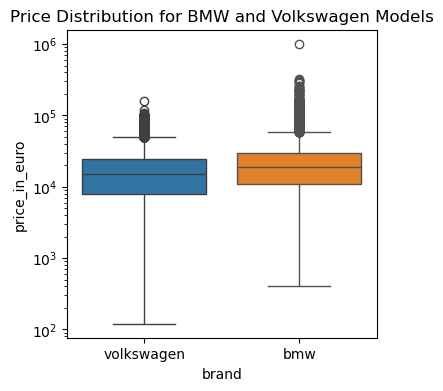

In [674]:
plt.figure(figsize=(4,4))
sns.boxplot(data=filtered_vw, x='brand', y='price_in_euro')
sns.boxplot(data=filtered_bmw, x='brand', y='price_in_euro')
plt.yscale('log')  # Optional: if prices vary a lot
#plt.xticks(rotation=45)
plt.title("Price Distribution for BMW and Volkswagen Models")
#plt.tight_layout()
plt.savefig("Price Distribution for BMW and Volkswagen Models.pdf")
plt.show()

- Most BMWS are priced between 10,000 euros and 50,000 euros.
- Median price is about 20,000 euros
- There are a lot of outliers- high-priced over 100,000 euros, with one reaching up to one million euros. \
- Compared to BMW, Volkswagen lower minimum prices are below 1000 euros indicating older or budget friendly models.
- Volkswagen are generally more affordable, there are some outliers but less extreme as compared to the BMW models. \
This shows that the different car models belonging to the same brands respectively have different price values

### Mileage vs Price

#### Is there a non linear relationship between mileage and price? 

In [678]:
df_main.head(3)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,01.10.1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.0,260.00,1605000.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,01.07.1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.0,225.00,1895000.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,01.11.1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.0,52.15,961270.0,"3.0i Super V6, absoluter Topzustand !"


In [679]:
df_main[["mileage_in_km", "price_in_euro"]].corr()

,mileage_in_km,price_in_euro
mileage_in_km,1.000000,-0.282671
price_in_euro,-0.282671,1.000000


We can see that there is a very weak negative correlation between the two columns. It can also be seen in the scatter plot obtained below

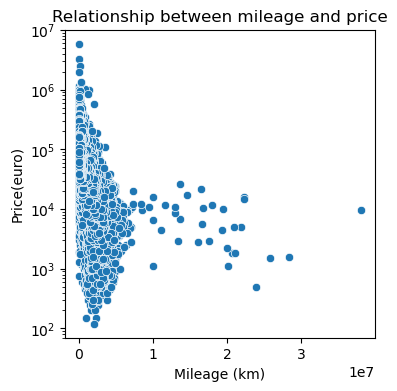

In [681]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_main, x="mileage_in_km", y="price_in_euro")
plt.yscale("log")
plt.title("Relationship between mileage and price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price(euro)")
plt.savefig("Mileage vs Price.pdf")
plt.show()

#### Do higher Mileage have lower Prices?

We will find the maximum Mileage value in the dataset. In order to find the variation of prices of cars according to mileage, we have split the different mileages into bins of ranges like 0-50000, 50000-100000, 100000-150000,...and so on up to 400000. 

In [684]:
df_main["mileage_in_km"]=df_main["mileage_in_km"]/10

In [685]:
df_main["mileage_in_km"].max()

3800000.0

In [686]:
df_main['Mileage_bin'] = pd.cut(df_main['mileage_in_km'], bins=[0, 50000, 100000, 150000, 200000, 300000, 350000, 400000])
mileage_price_df=df_main.groupby('Mileage_bin')['price_in_euro'].mean().reset_index()
mileage_price_df

C:\Users\shils\AppData\Local\Temp\ipykernel_2372\2179234888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price_df=df_main.groupby('Mileage_bin')['price_in_euro'].mean().reset_index()


,Mileage_bin,price_in_euro
0,"(0, 50000]",36953.238513
1,"(50000, 100000]",23591.976849
2,"(100000, 150000]",16623.444093
3,"(150000, 200000]",12011.552879
4,"(200000, 300000]",8643.553422
5,"(300000, 350000]",6812.504448
6,"(350000, 400000]",6341.623465


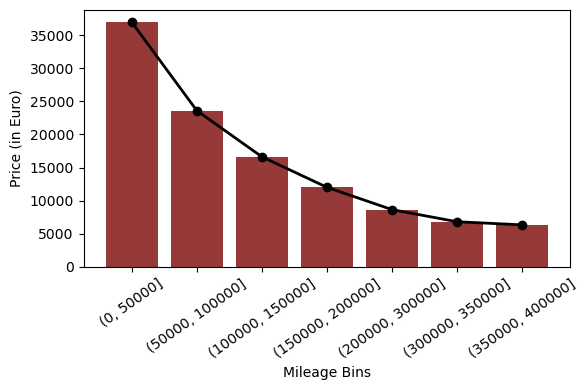

In [687]:
mileage_price_df['Mileage_bin'] = mileage_price_df['Mileage_bin'].astype(str)
plt.figure(figsize=(6, 4))
sns.barplot(x="Mileage_bin", y="price_in_euro", data=mileage_price_df, color="brown")
plt.plot(mileage_price_df['Mileage_bin'], mileage_price_df['price_in_euro'], color='black', marker='o', linewidth=2, label='Trend')
plt.xticks(rotation=35)
plt.xlabel("Mileage Bins")
plt.ylabel("Price (in Euro)")
plt.tight_layout()
plt.savefig("Mileage Bins vs Price.pdf")
plt.show()

The barplot shows that the cars in the range of shorter mileages have a higher values as compared to the cars in the range of longer mileages. The reasons for this decrease is because 
- Higher mileage means the car will be priced lower
- Higher mileage also involves increase wear and tear, and high repairing costs
- While some cars are built to last, higher mileage decreases the overall lifespan of the car. 

#### What are the average prices of cars with mileage above and below 100,000 km?

In [690]:
high=df_main[df_main["mileage_in_km"]<=100000]["price_in_euro"].mean()
low=df_main[df_main["mileage_in_km"]>100000]["price_in_euro"].mean()
print("Average price under 100k km", low)
print("Average price over 100k km", high)

Average price under 100k km 13250.732339309361
Average price over 100k km 31604.814914521383


The average prices of cars with mileage about 100,000 km are more than the average prices of cars with mileage below 100,000 km because of the reasons stated previously.

### Power vs Price

#### How does engine power influence resale value, and is there a saturation point where more power no longer adds value?

In [694]:
df_main.head(3)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,Mileage_bin
0,alfa-romeo,Alfa Romeo GTV,red,01.10.1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.0,260.00,160500.0,2.0 V6 TB,"(150000, 200000]"
1,alfa-romeo,Alfa Romeo Spider,black,01.07.1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.0,225.00,189500.0,2.0 16V Twin Spark L,"(150000, 200000]"
2,alfa-romeo,Alfa Romeo 164,red,01.11.1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.0,52.15,96127.0,"3.0i Super V6, absoluter Topzustand !","(50000, 100000]"


We will plot a regression plot to check how the power and price are related. We will take power in the horsepower units in this case

In [696]:
df_main["power_ps"] = df_main["power_ps"].astype(str).str.extract(r'(\d+)')
df_main["power_ps"] = pd.to_numeric(df_main["power_ps"], errors='coerce')
df_main = df_main.dropna(subset=["power_ps"])
df_main["power_ps"] = df_main["power_ps"].astype(int)

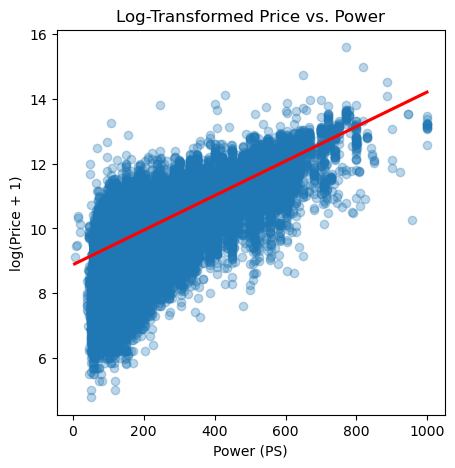

In [697]:
plt.figure(figsize=(5,5))
sns.regplot(x="power_ps", y=np.log1p(df_main['price_in_euro']), data=df_main,
            scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Log-Transformed Price vs. Power")
plt.xlabel("Power (PS)")
plt.ylabel("log(Price + 1)")
plt.show()

- There is a positive correlation between Power and Price. More the power higher is the price.
- Flattening towards higher power, price growth slows down suggesting a saturation point
- Lots of dots below the line at high power. It can be concluded that not all cars are expensive some may be older or damaged.

### Registration Year Analysis

#### How does the vehicle age impact price? 

In [701]:
print(df_main.columns.tolist())

['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'transmission_type', 'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km', 'offer_description', 'Mileage_bin']


We want to calculate the age of the each individual cars model upto 2025. We can do this by making a seperate column as "vehicle_age" and subtracting the years of the respective car models from 2025.

In [748]:
df_main["vehicle_age"] = 2025 - df_main["year"] 
df_main.tail(3)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,Mileage_bin,vehicle_age
223831,volvo,Volvo XC60,silver,01.03.2023,2023.0,54500.0,145.0,197,Automatic,Diesel,5.0,142.0,5900.0,B4 Autom. Plus Dark Sitzhzg.,"(0, 50000]",2.0
223832,volvo,Volvo XC90,white,01.03.2023,2023.0,89690.0,173.0,235,Automatic,Diesel,7.0,202.0,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...,"(0, 50000]",2.0
223833,volvo,Volvo V60,white,01.05.2023,2023.0,61521.0,145.0,197,Automatic,Diesel,4.0,125.0,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)","(0, 50000]",2.0


In [751]:
avg_age = df_main.groupby("vehicle_age")["price_in_euro"].mean().reset_index()
avg_age.head(3)

,vehicle_age,price_in_euro
0,2.0,41046.601188
1,3.0,42314.517784
2,4.0,37333.819078


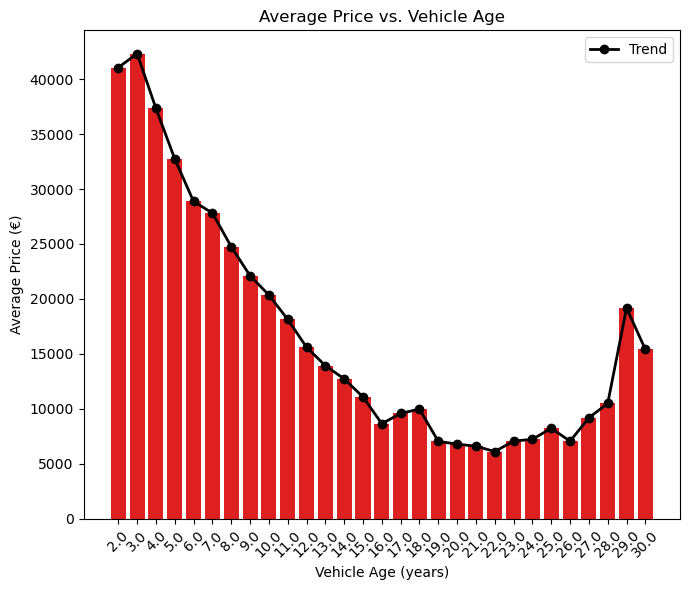

In [705]:
avg_age["vehicle_age"] = avg_age["vehicle_age"].astype(str)
plt.figure(figsize=(7,6))
sns.barplot(x="vehicle_age", y="price_in_euro", data=avg_age, color="red")
plt.plot(avg_age['vehicle_age'], avg_age['price_in_euro'], color='black', marker='o', linewidth=2, label='Trend')
plt.title("Average Price vs. Vehicle Age")
plt.ylabel("Average Price (€)")
plt.xlabel("Vehicle Age (years)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- Steep Price Drop with Age (2-10) years
  - Newer vehicles (2-4) years old have the highest average prices around 42,000 euros
  - From age 5 to 10 years the price drops rapidly indicating heavy depreciation in early years- typical pattern for car markets
- Gradual Depriciation
  - From 10 to 18 years, prices continue to fall but at a slower rate
  - The lowest ever recorded was for the vehicle of 22 years around 6000 euros
- Stabilization and Low Plateau (18-25 years)
  - Prices remain relatively low and stable in this range
  - The vehicles in this range are at the bottom of their resale value.
- Slight Price Increases for Older Vehicles
  - An unexpected peak takes from 17-30 years
  - This may indicate the presence of vintage cars which are typically of higher prices due to rarity or collector value.

We can also look into the number of cars of each brand belonging to each of the age groups and their names respectively

In [736]:
df_main["vehicle_age"].value_counts().sort_index()

vehicle_age
2.0     19365
3.0     17150
4.0     12475
5.0     15491
6.0     25619
7.0     21475
8.0     17293
9.0     13889
10.0    11872
11.0     9904
12.0     8745
13.0     7483
14.0     6959
15.0     5652
16.0     6039
17.0     4519
18.0     3770
19.0     3686
20.0     3159
21.0     2457
22.0     1937
23.0     1442
24.0     1076
25.0      843
26.0      620
27.0      371
28.0      264
29.0      132
30.0       65
Name: count, dtype: int64

In [746]:
df_main[df_main["vehicle_age"] == 30]["model"]

0                 Alfa Romeo GTV
1              Alfa Romeo Spider
21446                    BMW 320
21447                    BMW 520
39310          Cadillac Eldorado
                   ...          
189885           Volkswagen Golf
189886    Volkswagen T4 Multivan
189887     Volkswagen T4 Allstar
189888           Volkswagen Golf
189889           Volkswagen Golf
Name: model, Length: 65, dtype: object

### Fuel Type Impact

#### Percentage distribution of car models according to fuel used


In [792]:
df_bar=df_main.groupby("fuel_type")["brand"].size().sort_values(ascending=False).reset_index()
df_bar

,fuel_type,brand
0,Petrol,132008
1,Diesel,78952
2,Hybrid,10308
3,LPG,1069
4,Electric,471
5,CNG,414
6,Diesel Hybrid,377
7,Other,87
8,Hydrogen,38
9,Unknown,23


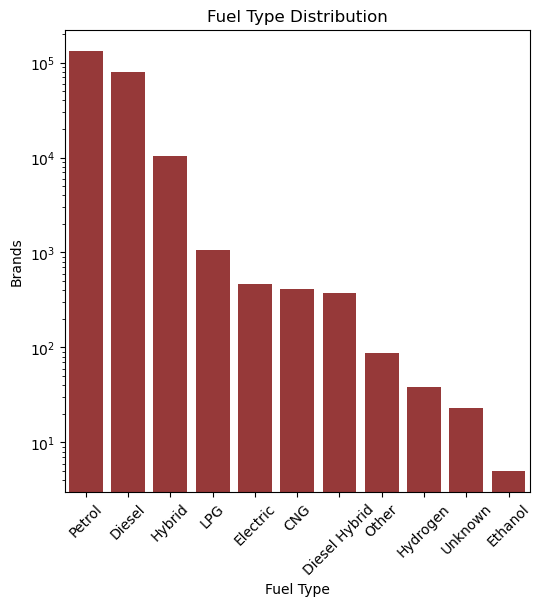

In [801]:
plt.figure(figsize=(6,6))
sns.barplot(x="fuel_type", y="brand", data=df_bar, color="brown")
plt.xticks(rotation=45)
plt.xlabel("Fuel Type")
plt.ylabel("Brands")
plt.title("Fuel Type Distribution")
plt.yscale("log")
plt.show()

We can see most of the cars are using petrol as the main fuel. There are reasons why most of the cars prefer petrol over diesel and other fuel types because:
- Petrol is cheaper than diesel and provides more comfortable driving
- Petrol engines are generally cheaper to manufacture, repair, and maintain, and they offer a smoother, quieter ride compared to diesel engines.
- diesel engines are more fuel-efficient, their higher initial cost and potential for more complex maintenance issues make petrol a more popular choice for many car buyers. 

#### Do Hybrids or Diesels Hold Betterin Certain km Ranges?

In [806]:
avg_prices = df_main.groupby(["Mileage_bin", "fuel_type"])["price_in_euro"].mean().unstack()
avg_prices

C:\Users\shils\AppData\Local\Temp\ipykernel_2372\2420793684.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prices = df_main.groupby(["Mileage_bin", "fuel_type"])["price_in_euro"].mean().unstack()


fuel_type,CNG,Diesel,Diesel Hybrid,Electric,Ethanol,Hybrid,Hydrogen,LPG,Other,Petrol,Unknown
Mileage_bin,,,,,,,,,,,
"(0, 50000]",17941.694301,41834.264358,54139.982222,36622.724444,NaN,36369.788566,36677.424242,29589.079096,36735.446154,35775.585344,23303.055556
"(50000, 100000]",15517.880000,27203.013854,37468.489130,23501.600000,9990.0,31217.061807,20787.500000,22503.872180,22159.230769,21228.818864,21281.250000
"(100000, 150000]",11670.787234,20443.152649,32898.941176,13990.000000,NaN,28424.969957,16990.000000,16211.138614,10030.000000,13054.558627,9500.000000
"(150000, 200000]",6982.343750,15024.608341,29231.545455,NaN,4090.0,24917.101449,NaN,7840.117021,13995.000000,8428.031687,NaN
"(200000, 300000]",6069.527778,10123.676658,16111.600000,NaN,5350.0,16580.085714,NaN,6074.416107,5084.000000,5773.729650,NaN
"(300000, 350000]",5902.000000,7244.810256,NaN,NaN,4500.0,13567.800000,NaN,5139.000000,NaN,4710.485342,NaN
"(350000, 400000]",1990.000000,6433.584615,NaN,NaN,NaN,17597.250000,NaN,4763.000000,NaN,5096.632353,NaN


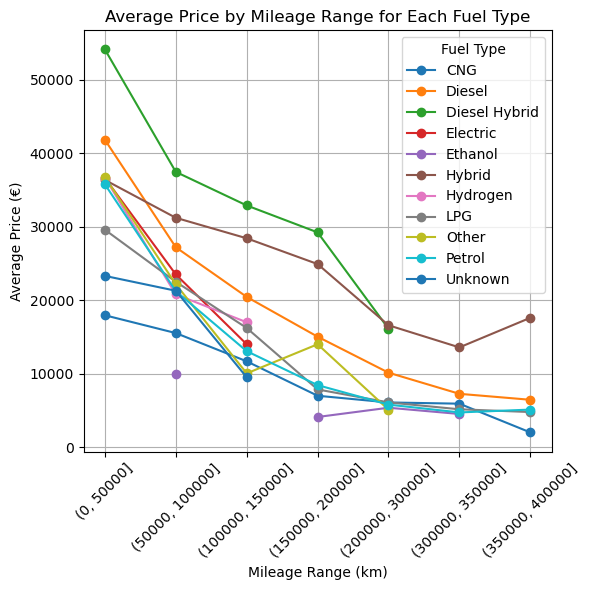

In [810]:
avg_prices.plot(kind='line', marker='o', figsize=(6,6))
plt.title("Average Price by Mileage Range for Each Fuel Type")
plt.xlabel("Mileage Range (km)")
plt.ylabel("Average Price (€)")
plt.grid(True)
plt.legend(title="Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ Diesel Hybrid (green line):
Starts off very strong (~€55,000) in the low mileage range.

Maintains higher-than-average prices even beyond 150k km.

Best overall at holding value across high mileage.

Great long-term value retention, likely due to fuel efficiency + modern tech.

✅ Hybrid (brown line):
Starts strong (~€32,000) and declines more slowly than most fuel types.

Even in high mileage (>300,000 km), hybrids maintain prices ~€17,000.

Shows very stable depreciation, ideal for long-term usage.

⚠️ Diesel (orange line):
Starts quite high (~€42,000), but depreciates faster than hybrids.

Still better than petrol or CNG at higher mileage.

A decent choice for long-distance drivers, but not as good as diesel hybrids.

❌ Electric, Petrol, CNG, LPG, Ethanol:
Steeper price drops as mileage increases.

Electric and ethanol vehicles fall sharply — may reflect battery aging or limited resale demand.

Petrol and CNG vehicles also lose value quickly past 100k km.